# Метод дихотомий

In [1]:
def dichotomy(target_func, a, b, eps):
    n_calls = 0
    while abs(b - a) > eps:
        x = (a + b) / 2
        delta = eps * 1e-3  # малая величина дельта для отступа
        fx_left = target_func(x - delta)
        fx_right = target_func(x + delta)
        n_calls += 2
        if fx_left > fx_right:
            a = x
        else:
            b = x
    return a, b, n_calls

# Метод золотого сечения

In [2]:
def golden_ratio(target_func, a, b, eps):
    n_calls = 0
    phi = (1 + 5 ** 0.5) / 2  # золотое сечение
    x1 = b - (b - a) / phi
    x2 = a + (b - a) / phi
    fx1 = target_func(x1)
    fx2 = target_func(x2)
    n_calls += 2
    while abs(b - a) > eps:
        if fx1 < fx2:
            b = x2
            x2 = x1
            x1 = b - (b - a) / phi
            fx2 = fx1
            fx1 = target_func(x1)
        else:
            a = x1
            x1 = x2
            x2 = a + (b - a) / phi
            fx1 = fx2
            fx2 = target_func(x2)
        n_calls += 1
    return a, b, n_calls

# Рисовалки

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def plot_target(funcs, a, b):
    x = np.linspace(a, b, 200)
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']  # список цветов для графиков

    plt.figure(figsize=(8, 6))
    legends = []  # список для легенды

    for i, f in enumerate(funcs):
        y = np.vectorize(f)(x)
        plt.plot(x, y, colors[i % len(colors)], linewidth=2, label=f'f{i}(x)')
        legends.append(f'f{i}(x)')

    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.title('График функций цели')
    plt.grid(True)
    plt.xlim(a, b)
    plt.legend(legends)
    plt.show()

def plot_compare(target_f, a, b, eps_list):
    dichotomy_steps = []
    golden_ratio_steps = []

    for eps in eps_list:
        a_d, b_d, n_d = dichotomy(target_f, a, b, eps)
        a_g, b_g, n_g = golden_ratio(target_f, a, b, eps)
        dichotomy_steps.append(n_d)
        golden_ratio_steps.append(n_g)

    plt.figure(figsize=(8, 6))
    plt.plot(dichotomy_steps, eps_list, 'bo-', label='Метод дихотомии')
    plt.plot(golden_ratio_steps, eps_list, 'rv--', label='Метод золотого сечения')
    plt.yscale('log')
    plt.xlabel('Число шагов'); plt.ylabel('eps')
    plt.title('Сравнение числа шагов методов')
    plt.legend()
    plt.grid(True)
    plt.show()

# Функции цели

In [4]:
from math import sin, exp, log, cos
def f_1(x):
    return x**2 - 4*x + 115

def f_2(x):
    return -16*sin(x) + 4*x**2 - 10

def f_3(x):
    return 60*cos(0.3*x - 2) + 50

# Тестовый запуск

In [26]:
a, b = -6, 6
f = f_3
digits = 14
eps = 10**-digits

a_d, b_d, n_d = dichotomy(f, a, b, eps)
a_g, b_g, n_g = golden_ratio(f, a, b, eps)

print(f"eps = {eps}")
print(f"Метод дихотомии:\n\tПолученный интервал: [{round(a_d, digits+1)}, {round(b_d, digits+1)}], число вызовов функции: {n_d}")
print(f"Метод золотого сечения:\n\tПолученный интервал: [{round(a_g, digits+1)}, {round(b_g, digits+1)}], число вызовов функции: {n_g}")

eps = 1e-14
Метод дихотомии:
	Полученный интервал: [-6, -5.999999999999995], число вызовов функции: 102
Метод золотого сечения:
	Полученный интервал: [-3.805308810176942, -3.805308810176935], число вызовов функции: 75


# Графики

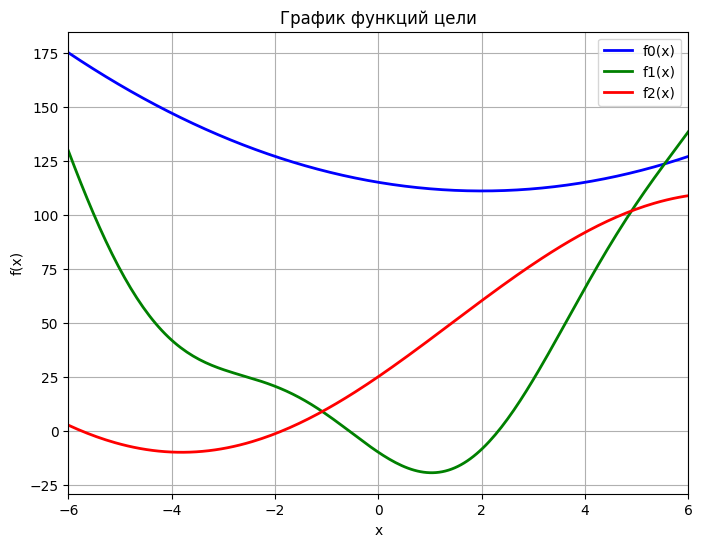

In [6]:
plot_target([f_1, f_2, f_3], a, b)

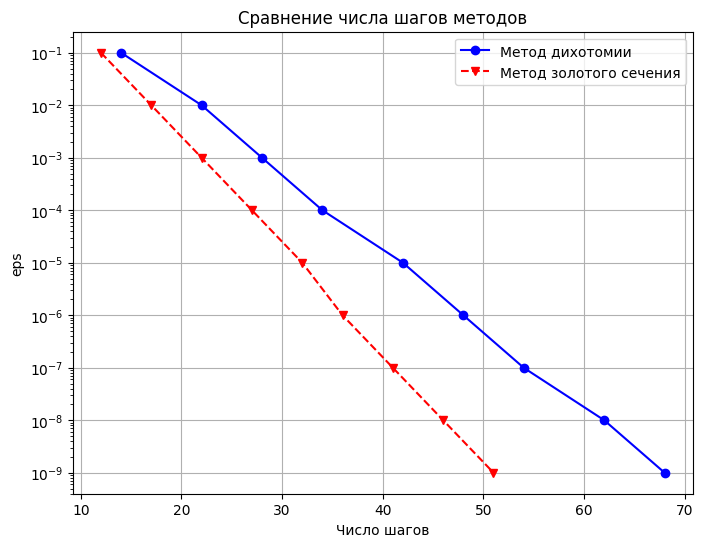

In [32]:
plot_compare(f_1, a, b, [1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9])